Copyright **`(c)`** 2025 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
import logging
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from icecream import ic

Cost: $d + (d \cdot \alpha \cdot w)^\beta$ with $\alpha \ge 0$ and $\beta \ge 0$

In [18]:
class Problem:
    _graph: nx.Graph
    _alpha: float
    _beta: float

    def __init__(
        self,
        num_cities: int,
        *,
        alpha: float = 1.0,
        beta: float = 1.0,
        density: float = 0.5,
        seed: int = 42,
    ):
        rng = np.random.default_rng(seed)
        self._alpha = alpha
        self._beta = beta
        cities = rng.random(size=(num_cities, 2))
        cities[0, 0] = cities[0, 1] = 0.5

        self._graph = nx.Graph()
        self._graph.add_node(0, pos=(cities[0, 0], cities[0, 1]), gold=0)
        for c in range(1, num_cities):
            self._graph.add_node(c, pos=(cities[c, 0], cities[c, 1]), gold=(1 + 999 * rng.random()))

        tmp = cities[:, np.newaxis, :] - cities[np.newaxis, :, :]
        d = np.sqrt(np.sum(np.square(tmp), axis=-1))
        for c1, c2 in combinations(range(num_cities), 2):
            if rng.random() < density or c2 == c1 + 1:
                self._graph.add_edge(c1, c2, dist=d[c1, c2])

        assert nx.is_connected(self._graph)

    @property
    def graph(self) -> nx.Graph:
        return nx.Graph(self._graph)

    @property
    def alpha(self):
        return self._alpha

    @property
    def beta(self):
        return self._beta

    def cost(self, path, weight):
        dist = nx.path_weight(self._graph, path, weight='dist')
        return dist + (self._alpha * dist * weight) ** self._beta

    def baseline(self):
        total_cost = 0
        for dest, path in nx.single_source_dijkstra_path(
            self._graph, source=0, weight='dist'
        ).items():
            cost = 0
            for c1, c2 in zip(path, path[1:]):
                cost += self.cost([c1, c2], 0)
                cost += self.cost([c1, c2], self._graph.nodes[dest]['gold'])
            logging.debug(
                f"dummy_solution: go to {dest} ({' > '.join(str(n) for n in path)} ({cost})"
            )
            total_cost += cost
        return total_cost

    def plot(self):
        plt.figure(figsize=(10, 10))
        pos = nx.get_node_attributes(self._graph, 'pos')
        size = [100] + [self._graph.nodes[n]['gold'] for n in range(1, len(self._graph))]
        color = ['red'] + ['lightblue'] * (len(self._graph) - 1)
        return nx.draw(self._graph, pos, with_labels=True, node_color=color, node_size=size)

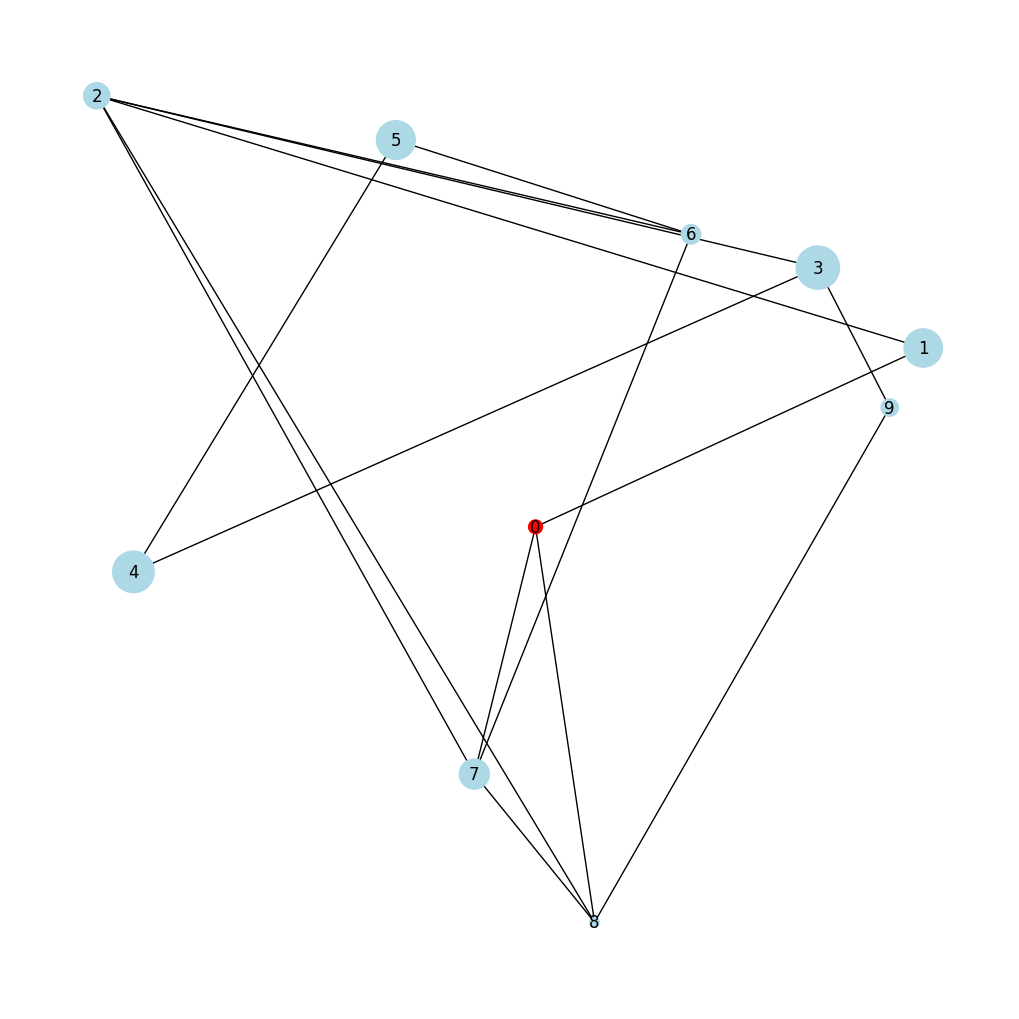

In [19]:
P = Problem(10, density=0.2, alpha=1, beta=1)
P.plot()

In [20]:
logging.getLogger().setLevel(logging.WARNING)

ic(Problem(100, density=0.2, alpha=1, beta=1).baseline())
ic(Problem(100, density=0.2, alpha=2, beta=1).baseline())
ic(Problem(100, density=0.2, alpha=1, beta=2).baseline())
ic(Problem(100, density=1, alpha=1, beta=1).baseline())
ic(Problem(100, density=1, alpha=2, beta=1).baseline())
ic(Problem(100, density=1, alpha=1, beta=2).baseline())
ic(Problem(1_000, density=0.2, alpha=1, beta=1).baseline())
ic(Problem(1_000, density=0.2, alpha=2, beta=1).baseline())
ic(Problem(1_000, density=0.2, alpha=1, beta=2).baseline())
ic(Problem(1_000, density=1, alpha=1, beta=1).baseline())
ic(Problem(1_000, density=1, alpha=2, beta=1).baseline())
ic(Problem(1_000, density=1, alpha=1, beta=2).baseline())
None

ic| Problem(100, density=0.2, alpha=1, beta=1)

.baseline(): np.float64(25266.40561851071)
ic| Problem(100, density=0.2, alpha=2, beta=1).baseline(): np.float64(50425.309618179184)
ic| Problem(100, density=0.2, alpha=1, beta=2).baseline(): np.float64(5334401.927002504)
ic| Problem(100, density=1, alpha=1, beta=1).baseline(): np.float64(18266.185795826725)
ic| Problem(100, density=1, alpha=2, beta=1).baseline(): np.float64(36457.91846237206)
ic| Problem(100, density=1, alpha=1, beta=2).baseline(): np.float64(5404978.08899582)
ic| Problem(1_000, density=0.2, alpha=1, beta=1).baseline(): np.float64(195402.95810394033)
ic| Problem(1_000, density=0.2, alpha=2, beta=1).baseline(): np.float64(390028.7212628889)
ic| Problem(1_000, density=0.2, alpha=1, beta=2).baseline(): np.float64(37545927.702134684)
ic| Problem(1_000, density=1, alpha=1, beta=1).baseline(): np.float64(192936.23377726728)
ic| Problem(1_000, density=1, alpha=2, beta=1).baseline(): np.float64(385105.6414957661)
ic| Problem(1_000, density=1, alpha=1, beta=2).baseline(): np.f